# PROJECT 1

### LINEAR REGRESSIONS & GRADIENT DECENT

BY: MOHAMMAD HAQUE, KRIS YU, DAVID WINTER

In [356]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

housingInfo = pd.read_csv('housing/train.csv')
housingInfo = housingInfo.sort_values("SalePrice")

#Data to Analyze from main data############
lotArea = housingInfo['LotArea']
overallQ = housingInfo['OverallQual']
overallC = housingInfo['OverallCond']
yearB = housingInfo['YearBuilt']
yearR = housingInfo['YearRemodAdd']
############################################



#Price
price = housingInfo['SalePrice']

all = pd.DataFrame({
    "LotArea":lotArea,
    "YearB": yearB,
    "OverallQ": overallQ,
    "OverallC": overallC,
    "YearR": yearR,
    "Price": price,
})

#NORMALIZING THE DATA!
all.sort_index(inplace=True)
all = (all-all.mean())/all.std()

#MY FEATURES
features = pd.DataFrame({
    "LotArea":all["LotArea"],
    "YearB": all["YearB"],
    "OverallQ": all["OverallQ"],
    "OverallC": all["OverallC"],
    "YearR": all["YearR"]
})

#MY LABEL
price = all["Price"] 

When we are starting with a dummy line we try and make it close to the line of best fit as possible through eyeballing. This is called bias, it is sometimes useful (especially in a simple case) but detremental on larger data sets.

### BASIC GRADIENT DESCENT

With this model we will look at the effect of one feature vs the label. The feature in turn is the Lot Area. The lot area in many cases does play a huge factor in the price of a house. We start off with a basic line of best fit described by y = wx + b to approximate the data given. To start we can use some dummy values for w and b. We can also use some guess work to see if the line fits okay. For now though we will choose 0=w and 0=b for simplicity's sake. 

We want to start by calculating the mean square error (MSE) of our line. In layman's term we are looking to see how bad our line fits with the data. This can be achieved with the following equation

### $MSE =  \frac{1}{m}\sum_{i=1}^{m}(y_{i}(x)-y_{i})^{2}$

Our goal is to minimize the Error that is given to us by the equation. One way to minimize any functions output is to take the derivative and solve it for 0. The issue is we have 2 variables that we need to optimize. This means we need to take the partial derivative based on the variable we are looking for.

### $b_{dir}:= \frac{2}{n}\sum_{i=1}^{n}(Y(x^{(i)})-Y^{(i)})$

### $w_{dir}:= \frac{2}{n}\sum_{i=1}^{n}(Y(x^{(i)})-Y^{(i)})x^{(i)}$

Once we have the new w anb b it only gives us the direction that we have to step to go towards the minimum. 



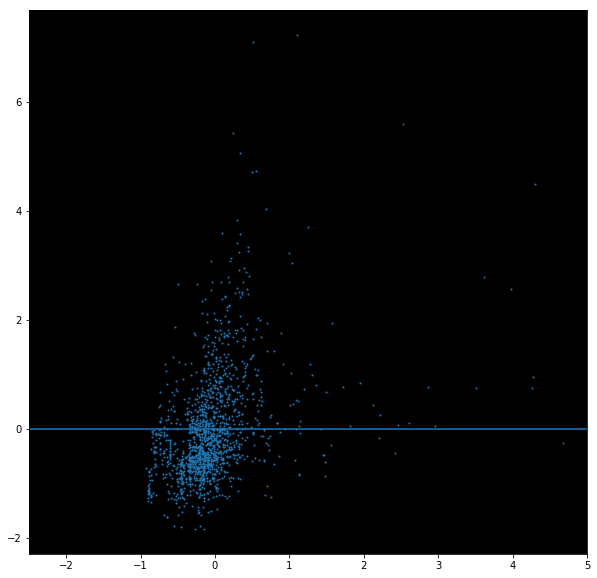

In [378]:
#lotArea Vs Price Model

X = all["LotArea"]
Y = price
n = lotArea.shape[0]
plt.figure(figsize=(10,10))
plt.scatter(X,Y,1)
plt.xlim(-2.5,5)
w = 0.
b = 0.
x = np.array(range(-10,10,1))
y = (w*x + b)
plt.plot(x,y)
plt.show()

In [380]:
# GRADIENT DECENT! (single variable)

def GradientDecent(w,b,X,y,learningRate,attempt):
    desc = 0
    err = []
    gw = []
    gb =[]
    while desc < attempt:
        yGuess = w * X + b
        wGrd = -(2/n) * sum(X * (Y - yGuess))
        bGrd =  -(2/n) * sum(Y - yGuess)

        newW = w - wGrd/learningRate
        newB = b - bGrd/learningRate
        gw.append(newW)
        gb.append(newB)
        err.append(mvLoss(X,Y,[newB,newW]))
        w = newW
        b = newB
        desc = desc + 1
    
    plt.figure(figsize=(10,5))
    plt.plot(range(0,attempt),err)
    plt.title('Cost VS Iteration',fontsize=25)
    plt.rcParams['axes.facecolor'] = 'black'
    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel('Cost', fontsize=14)
    plt.show
    return [w,b]

In [351]:
def mvLoss(X,Y,W):
    X = X.values
    i = 0
    MSE = 0
    w = W[1:]
    b = W[0]
    while i < Y.size:
        if(X[i].size == 1):
            MSE = MSE + (Y[i] - (b + w[0]*X[i]))**2
        else:
            MSE = MSE + (Y[i] - (b + sum(w*X[i])))**2
        i = i +1
    MSE = MSE / Y.size
    return MSE

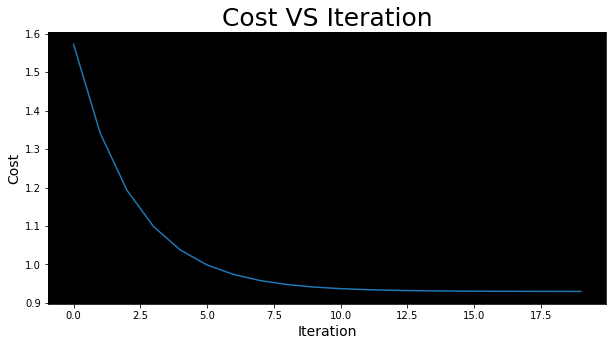

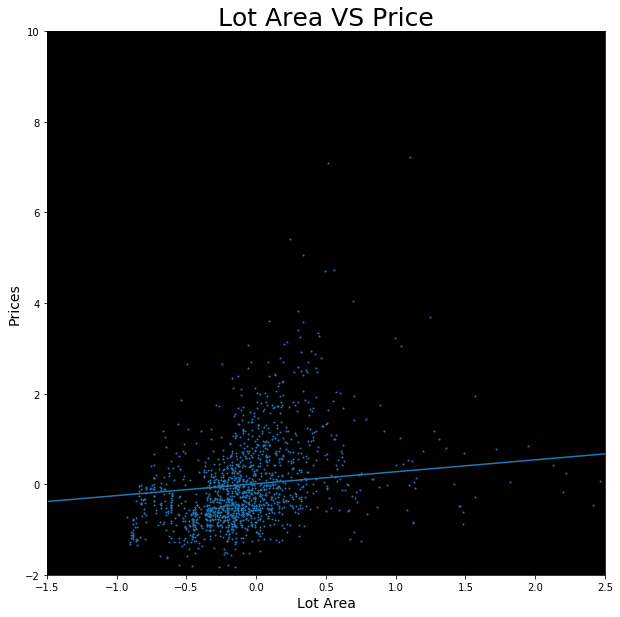

New w: 0.2631047652442944
New b: 0.011529215046068627


In [389]:
X = features["LotArea"]
result = GradientDecent(.2,1,X,Y,10,20)
w = result[0]
b = result[1]
plt.figure(figsize=(10,10))
plt.scatter(X,Y,1)
x = np.array(range(-10,10))
plt.xlim(-1.5,2.5)
plt.ylim(-2,10)
y = (w*x + b)
plt.title('Lot Area VS Price',fontsize=25)
plt.xlabel('Lot Area', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.plot(x,y)
plt.show()
print("New w:",w)
print("New b:",b)

## Now let's look at the case of n features added to the linear regression model

The "line" of best fit can be given by the following formula. Technically it is not a line since it's in a dimension, higher than what we can perceive hence why we did the single dimension example.

### $Y_{w}(x)= w_{1}x_{1} + ... + w_{n}x_{n}$  where $x_{1} = 1$

The mean square error represents the error that the "line" has in correspond to the data. Using this following equation we can find the MSE of our line vs the data set.

### $MSE =  \frac{1}{m}\sum_{i=1}^{m}(Y(x^{(i)})-Y)^{2}$

Finally the main goal we want to do is to minimize the error. The best way to do this is to find the derivative of the MSE function and set that to equal to zero. The issue with that is that we have multiple variables that we have to decipher. This leads to us doing a partial derivative on the MSE function for each label that we have. Then using a learning rate denoted by $\alpha$ we multiply the result and subtract from our original weight. The reason behind this is because the partial derivative tells us what direction we have to go to get to the minimum error. It however does not tell us how far we have to go to get there. If we decide to go at the rate given by the partial derivative we may overshoot the data and loose the minimum. If we take small steps however we may slowly approach the minimum. This is the use of $\alpha$. 

### $w_{j}:= w_{j} - \alpha \frac{2}{m}\sum_{i=1}^{m}(Y(x^{(i)})-Y^{(i)})x_{j}^{(i)}$


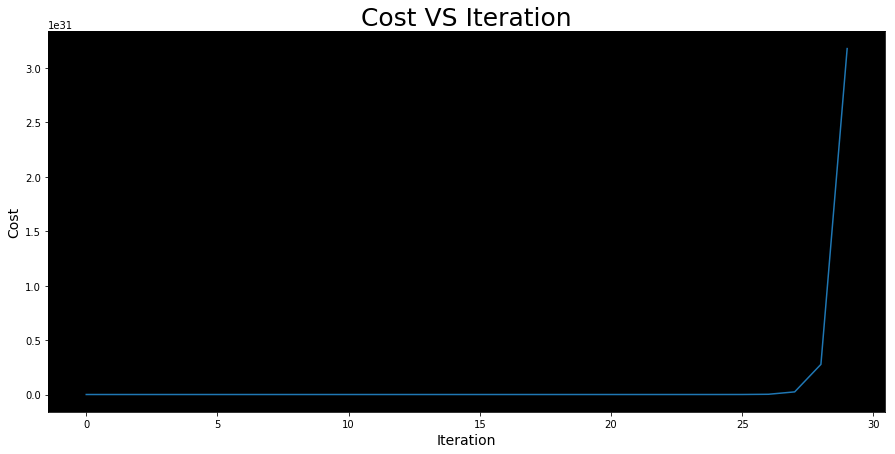

b 0  =  -9.619123814237357
w 1  =  -241433382605254.2
w 2  =  -2271511382583303.5
w 3  =  -2114227168885023.5
w 4  =  751286536335008.8
w 5  =  -2056930467973053.0


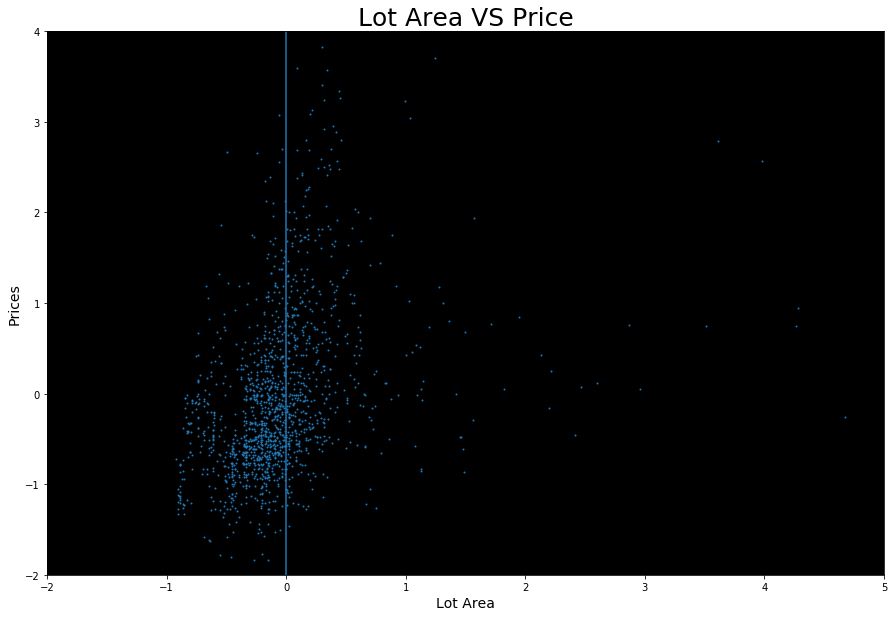

New w: -241433382605254.2 New b: -9.619123814237357


In [402]:
#GRADIENT DECENT WITH n VARIABLES
def gradientDecent(X,Y,W,FeatureNames,learningRate=40,attempt=50):
    XRow = X.values
    size = Y.size
    NewW = np.zeros(W.size)
    toTeachW = np.zeros(W.size)
    desc = 0
    lossA = []
    while desc < attempt:
        i = 0
        initW = NewW[0]
        WeightL = NewW[1:]
        guessY = []
        #GUESS Y WITH MODEL
        for x in XRow:
            guessY.append(initW + sum(x*WeightL))

        #GET THE NEW WEIGHT BASED ON EACH DERIVATIVE
        toTeachW[0] = (-2/size)*sum(guessY-Y)
        for f in FeatureNames:
            x = X[f]
            toTeachW[i+1] = (-2/size)*sum((guessY - Y)*x)
            i=i+1
        #ADJUST WEIGHT BASED ON THE LEARNING RATE
        getLoss(X["LotArea"].values,Y,NewW[1],NewW[0])
        NewW = NewW + toTeachW/learningRate
        desc = desc + 1
        lossA.append(mvLoss(X,Y, NewW)) ###
    plt.figure(figsize=(15,7))
    plt.plot(range(0,attempt),lossA)
    plt.title('Cost VS Iteration',fontsize=25)
    plt.rcParams['axes.facecolor'] = 'black'
    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel('Cost', fontsize=14)
    plt.show()
    return NewW
names = [
"LotArea",
"YearB",
"OverallQ",
"OverallC",
"YearR"
]

alpha =gradientDecent(features,price,np.zeros(1+len(names)),names,1,30)
i =0
for a in alpha:
    if i == 0:
        print("b",i," = ",a)
    else:
        print("w",i," = ",a)
    i=i+1
newW = alpha[1]
newB = alpha[0]

X = all["LotArea"]
plt.figure(figsize=(15,10))
plt.scatter(X,Y,1)
plt.title('Lot Area VS Price',fontsize=25)
plt.xlabel('Lot Area', fontsize=14)
plt.ylabel('Prices', fontsize=14)
x = np.array(range(-10,50,1))
y = (newW*x + newB)
plt.xlim(-2,5)
plt.ylim(-2,4)
plt.plot(x,y)
plt.show()
print("New w:",newW,"New b:",newB)


Now lets see how well our model fairs against some test data.

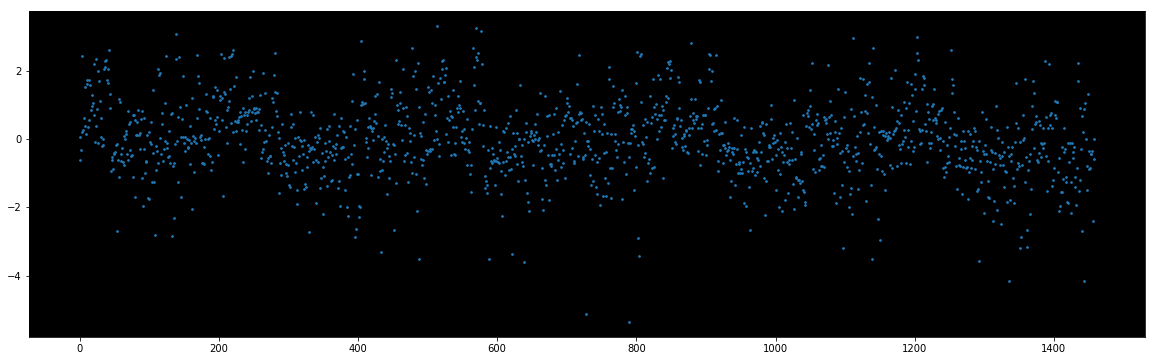

In [368]:
testingInfo = pd.read_csv('housing/test.csv')

#Data to Analyze from main data############
lotAreaT = testingInfo['LotArea']
overallQT = testingInfo['OverallQual']
overallCT = testingInfo['OverallCond']
yearBT = testingInfo['YearBuilt']
yearRT = testingInfo['YearRemodAdd']
############################################



#Price
result = pd.read_csv('housing/sample_submission.csv')
allT = pd.DataFrame({
    "LotArea":lotAreaT,
    "YearB": yearBT,
    "OverallQ": overallQT,
    "OverallC": overallCT,
    "YearR": yearRT,
    "SalePrice" : result["SalePrice"]
})

allT = (allT - allT.mean())/ allT.std()

testFeatures = pd.DataFrame({
    "LotArea":allT["LotArea"],
    "YearB": allT["YearB"],
    "OverallQ": allT["OverallQ"],
    "OverallC": allT["OverallC"],
    "YearR": allT["YearR"],
})
result =  allT["SalePrice"]

def calcFeature(w,x):
    return w[0] + sum(w[1:]*x)

testFeatures = testFeatures.values
i = 0
guessCheck = np.zeros(result.size)
for tf in testFeatures:
    res = calcFeature(a,tf)
    guessCheck[i] = res
    i = i + 1
guessCheck = guessCheck - result

plt.figure(figsize=(20,6))
plt.scatter(range(0,guessCheck.size),guessCheck,3)
plt.show()